In [32]:
import numpy as np
import os
import os.path
import glob
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Logistic Regression with Tfidf vectorizer.csv
Opti-NN-Train NN 256 - 128 - 1.csv
Keras LSTM NN.csv
Keras DAN.csv
Keras CNN with pretrained embedding.csv
Opti-NN-Train NN 50 - 10 - 1.csv


,acc,batch_size,categorical_accuracy,loss,nb_epochs,sample_size,title,title_short,train_acc,train_test_ratio,training_duration_in_secs,training_set_size,val_acc,val_categorical_accuracy,val_loss,validation_set_size,vocab_size
1,NaN,NaN,NaN,NaN,2.0,18500,Keras CNN with pretrained embedding,Keras CNN,0.9,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,NaN
0,0.860494,NaN,NaN,0.322978,3.0,3000,Keras LSTM NN,Keras LSTM,NaN,NaN,NaN,NaN,0.802222,NaN,0.547166,NaN,NaN
0,0.757227,64.0,NaN,0.500543,20.0,12500,Opti-NN-Train NN 50 - 10 - 1,Opti-NN-Tr,NaN,0.25,34.612682,9375.0,0.838400,NaN,0.379216,3125.0,1000.0
0,0.885440,64.0,NaN,0.285670,5.0,12500,Opti-NN-Train NN 256 - 128 - 1,Opti-NN-Tr,NaN,0.25,16.742604,9375.0,0.840320,NaN,0.371287,3125.0,1000.0
0,0.819573,NaN,0.819573,0.405207,12.0,12500,Keras DAN,Keras DAN.,NaN,NaN,NaN,NaN,0.841760,0.84176,0.362056,NaN,NaN
0,0.926613,NaN,NaN,NaN,NaN,12500,Log Reg,Logistic R,NaN,NaN,NaN,NaN,0.882560,NaN,NaN,NaN,NaN


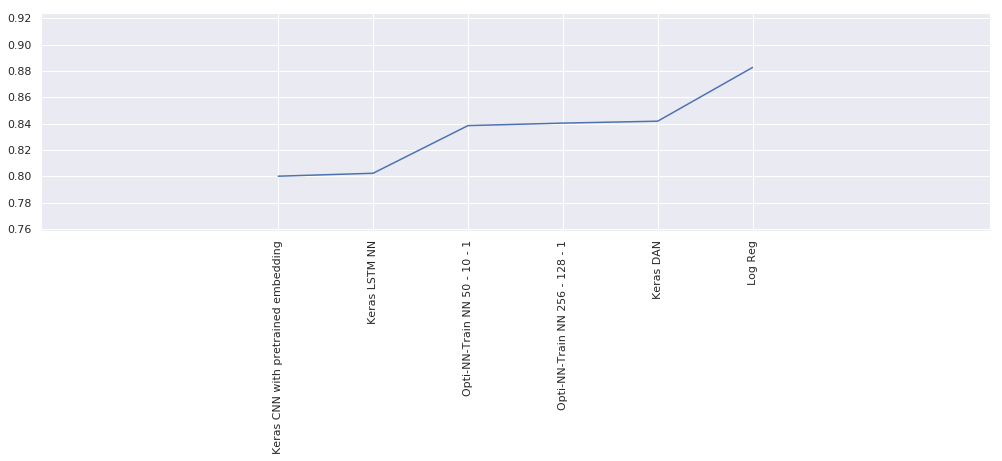

In [58]:
# reports=pd.concat([pd.DataFrame().from_csv("reports/Keras DAN.csv"),
#                   pd.DataFrame().from_csv("reports/Keras LSTM NN.csv")])
reports=pd.DataFrame()
report_names = os.listdir(path="reports")

for name in report_names:
    if ".csv" in name and "K-fold" not in name and "K-Fold" not in name:
        print(name)
        report=pd.DataFrame().from_csv("reports/" + name)
        report["title_short"]=name[:10]
        reports=pd.concat([reports,report])
# print(reports)
reports.sort_values(by="val_acc",inplace=True)
plt.rcParams["figure.figsize"] = [17,4]
plt.plot(reports.title,reports.val_acc)
plt.xticks(rotation='vertical')
plt.margins(0.5)
reports

Opti-NN-Optimise with K-folds - Low dropout on 1 layer.csv
Opti-NN-Optimise with K-folds - No dropouts.csv
Opti-NN-Optimise with K-folds - High dropout on 2 layers.csv
Opti-NN-Optimise with K-folds - High dropout on 1 layer.csv
Opti-NN-Optimise with K-folds - Low dropout on 2 layers.csv


,acc,loss,val_acc,val_loss,title,sample_size,batch_size,train_test_ratio,training_set_size,validation_set_size,vocab_size,nb_epochs,training_duration_in_secs,title_short
0,0.98368,0.051272,0.99936,0.005888,Opti-NN-Optimise with K-folds - Low dropout on...,9375,64,0.333333,6250,3125,1000,5,54.903074,Opti-NN-Op
0,0.99872,0.005465,0.99936,0.004106,Opti-NN-Optimise with K-folds - No dropouts,9375,64,0.333333,6250,3125,1000,5,50.142298,Opti-NN-Op
0,0.96608,0.100862,0.99936,0.009122,Opti-NN-Optimise with K-folds - High dropout o...,9375,64,0.333333,6250,3125,1000,5,59.345510,Opti-NN-Op
0,0.98624,0.045254,0.99968,0.009790,Opti-NN-Optimise with K-folds - High dropout o...,9375,64,0.333333,6250,3125,1000,5,66.466385,Opti-NN-Op
0,0.99696,0.012528,0.99968,0.004451,Opti-NN-Optimise with K-folds - Low dropout on...,9375,64,0.333333,6250,3125,1000,5,62.224276,Opti-NN-Op


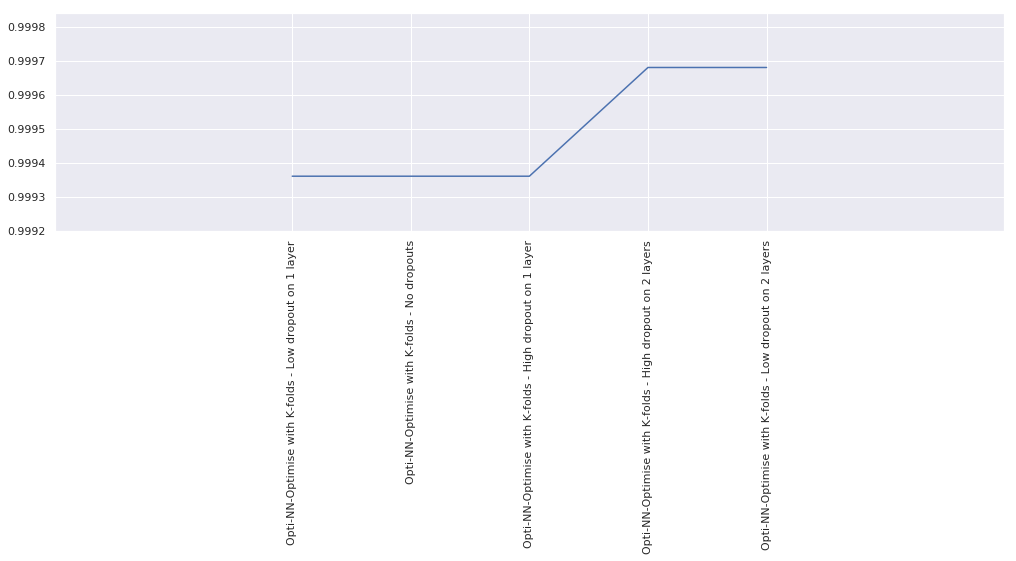

In [62]:
# reports=pd.concat([pd.DataFrame().from_csv("reports/Keras DAN.csv"),
#                   pd.DataFrame().from_csv("reports/Keras LSTM NN.csv")])
reports=pd.DataFrame()
report_names = os.listdir(path="reports")

for name in report_names:
    if ".csv" in name and "Keras" not in name and "Train NN" not in name\
        and "Log" not in name:
        print(name)
        report=pd.DataFrame().from_csv("reports/" + name)
        report["title_short"]=name[:10]
        reports=pd.concat([reports,report])
# print(reports)
reports.sort_values(by="val_acc",inplace=True)
plt.rcParams["figure.figsize"] = [17,4]
plt.plot(reports.title,reports.val_acc)
plt.xticks(rotation='vertical')
plt.margins(0.5)
reports

Logistic regression looks very suspicious, to check again
LSTM must be run on the whole sample
CNN was not run on many epochs compared to others, and sample size is suspicious
need to include the batch size in all NN notebooks and use the same ideally: 64
why is the dan network not way better than the simple dense layers (which have no embedding and have a simpler architecture)
